<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


* RowNumber — индекс строки в данных

* CustomerId — уникальный идентификатор клиента

* Surname — фамилия

* CreditScore — кредитный рейтинг

* Geography — страна проживания

* Gender — пол

* Age — возраст

* Tenure — сколько лет человек является клиентом банка

* Balance — баланс на счёте

* NumOfProducts — количество продуктов банка, используемых клиентом

* HasCrCard — наличие кредитной карты

* IsActiveMember — активность клиента

* EstimatedSalary — предполагаемая зарплата

Целевым признаком является столбец Exited — факт ухода клиента

In [5]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [6]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data['Tenure'] = data['Tenure'].fillna(0).astype('int')
# заменим пропуски на 0 так  скорее всего пропуск говорит о том, что недвижимости нет

In [10]:
data = data.drop(['Surname', 'RowNumber','CustomerId'], axis=1)
# убираем столбец RowNumber, так как он дублирует фактическую нумерацию ,и CustomerId и Surname, так как значения в них не влияют на дальнейший анализ.

In [11]:
data.columns = data.columns.str.lower()
data.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [12]:
data = data.rename(columns={'creditscore':'credit_score', 'numofproducts':'num_of_products', 'hascrcard':'has_cr_card', 'isactivemember':'is_active_member','estimatedsalary': 'estimated_salary'})
data.head(5)
#  приводим к нижнему регистру и понятному восприятию

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



* В таблице 10000 объектов. 
* Были пропуски в столбце Tenure ( заполнили), перевели данные
* Явных дубликатов не обнаружено
* Избавились от столбца RowNumber, так как он дублирует нумерацию объектов с шагом 1, и от CustomerId и Surname, так как значения в них не влияют на дальнейший анализ.
* Изменили названия стобцов -
* Из таблицы делаем вывод, что есть группа из мужчин и женщин, из 3 стран, разного возраста с разным кредитным рейтингом и балансом. На основании этих данных будет строить исследования

## Исследование задачи

Рассмотрим график значений оттока и оставшихся клиентов

Соотношение оттока и тех кто остался 1:4. Такое соотношение говорит, что присутствует дисбаланс в данных.

<AxesSubplot:title={'center':'Соотношение ушел/остался'}>

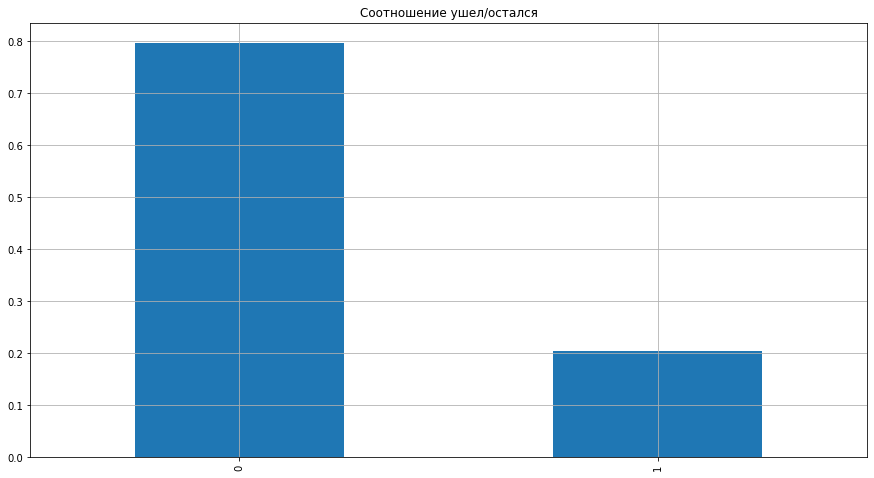

In [13]:
data['exited'].value_counts(normalize=True).plot(kind='bar',grid=True,figsize=(15,8),title='Соотношение ушел/остался')

по графику видно, что отток зависит от возраста. Больше всего уходит клиентов в возрасте от 40 до 50 лет. 

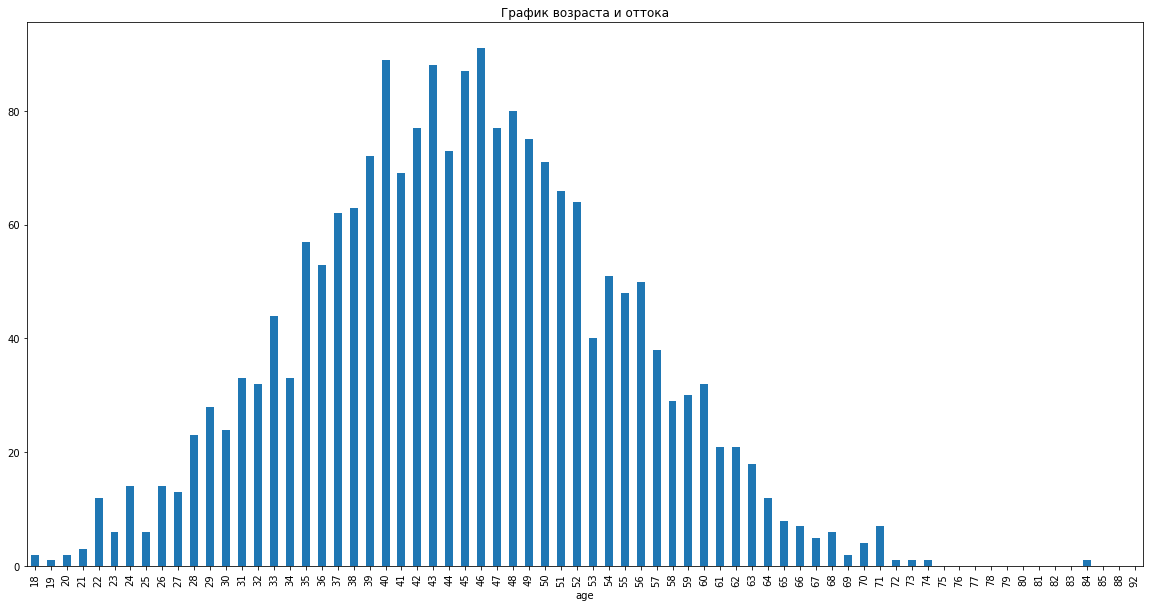

In [14]:
data.groupby('age')['exited'].sum().plot(figsize=(20,10),kind='bar',title='График возраста и оттока')
plt.show()

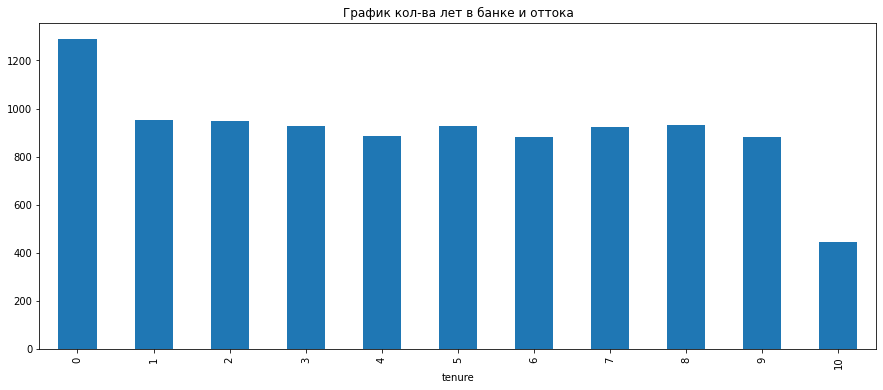

In [15]:
data.groupby('tenure')['exited'].count().plot(figsize=(15,6),kind='bar',title='График кол-ва лет в банке и оттока')
plt.show()

In [16]:
#Кодирование данных ,данные подготовим методом OHE, что позволит нам использовать разные модели и не словить дамми ловушку
data_ohe = pd.get_dummies(data, drop_first=True)

In [17]:
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Сформируем выборки
Обуч - 60, Валид - 20, тест - 20

In [18]:
#создаю переменные для признаков и целевого признака:
#разделяю данные на обучающую и валидационную выборки
#разделяю валидационную выборку на валидационную и тестовую
features = data_ohe.drop(['exited'], axis=1)
target = data_ohe['exited']
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target, test_size=0.4,
                                                                              random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_valid,
                                                                            target_valid, test_size=0.5,
                                                                            random_state=12345)
#смотрю размеры получившихся выборок:
for i in [features_train, features_valid, target_train, target_valid, features_test, target_test]:
    print(i.shape)

(6000, 11)
(2000, 11)
(6000,)
(2000,)
(2000, 11)
(2000,)


In [19]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2,147435.96,1,0,0,187508.06,1,0,0


In [20]:
# стандартизируем тестовую и валидную выборку, т.к есть значения и маленькие и очень большие.
numeric = ['credit_score','age','tenure','balance','num_of_products','estimated_salary']

In [21]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [22]:
features_train[numeric] = scaler.transform(features_train[numeric])

/tmp/ipykernel_78/3292835044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [23]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Строим модели без учета баланса

In [24]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_dtc = DecisionTreeClassifier(random_state=12345)
    dtc_score = model_dtc.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_rfc = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=12345)
    rfc_score = model_rfc.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_lgr = LogisticRegression(solver = 'liblinear')
    lgr_score = model_lgr.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", dtc_score, "случайный лес ", rfc_score, "логистическая регрессия", lgr_score)

In [25]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.7845 случайный лес  0.8415 логистическая регрессия 0.791


In [26]:
target_train.value_counts(normalize = 1)
# видим подверждение нашего графика и дисбаланс, 80 на 20 или 1 к 4

0    0.800667
1    0.199333
Name: exited, dtype: float64

In [27]:
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_dtc = DecisionTreeClassifier(random_state=12345)
    model_dtc.fit(features_train, target_train)
    dtc_share = pd.Series(model_dtc.predict(features_valid)).value_counts(normalize = 1)
    
    
    
    model_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model_rfc.fit(features_train, target_train)
    rfc_share = pd.Series(model_rfc.predict(features_valid)).value_counts(normalize = 1)
    
    model_lgr = LogisticRegression(solver = 'liblinear')
    model_lgr.fit(features_train, target_train)
    lgr_share = pd.Series(model_lgr.predict(features_valid)).value_counts(normalize = 1)
    

    
    print("Доли ответов:" "дерево решений", dtc_share, "случайный лес ",  rfc_share, "логистическая регрессия", lgr_share)

In [28]:
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:дерево решений 0    0.798
1    0.202
dtype: float64 случайный лес  0    0.8795
1    0.1205
dtype: float64 логистическая регрессия 0    0.9235
1    0.0765
dtype: float64


Логистичесая регрессия показывала самую высокую точность, далее случайный лес и в конце дерево решений.
С учетом дисбаланса результата неудивительно что модели с большой вероятностью будут выдавать ответ 0, построим матрицы ошибок для моделей

Случайный лес

In [29]:
model_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_rfc.fit(features_train, target_train)
rfc_prediction = model_rfc.predict(features_valid)
confusion_matrix(target_valid, rfc_prediction)

array([[1514,   63],
       [ 245,  178]])

In [30]:
# функция для изучения трех параметров
def all_models(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction,zero_division=1))
    print("Точность", precision_score(target_valid, prediction,zero_division=1))
    print("F1-мера", f1_score(target_valid, prediction,zero_division=1))

In [31]:
all_models(target_valid, rfc_prediction)

Полнота 0.42080378250591016
Точность 0.7385892116182573
F1-мера 0.536144578313253


In [32]:
probabilities_tree=model_rfc.predict_proba(features_valid)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_valid_tree)
auc_roc_tree=roc_auc_score(target_valid,probabilities_one_valid_tree)
auc_roc_tree

0.8513141779510727

Случайный лес примерно равную пропорцию позитивных и негативных предсказаний, выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно позитивным предсказаниям (FP). Точность и качество также низкое

In [33]:
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=5)
model_rfc.fit(features_train, target_train)
rfc_prediction = model_rfc.predict(features_valid)
all_models(target_valid, rfc_prediction)

Полнота 0.28841607565011823
Точность 0.8026315789473685
F1-мера 0.42434782608695654


In [34]:
probabilities_tree=model_rfc.predict_proba(features_valid)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_valid_tree)
auc_roc_tree=roc_auc_score(target_valid,probabilities_one_valid_tree)
auc_roc_tree

0.8466212741971995

In [35]:
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=14)
model_rfc.fit(features_train, target_train)
rfc_prediction = model_rfc.predict(features_valid)
confusion_matrix(target_valid, rfc_prediction)
all_models(target_valid, rfc_prediction)

Полнота 0.41843971631205673
Точность 0.75
F1-мера 0.5371775417298937


In [36]:
probabilities_tree=model_rfc.predict_proba(features_valid)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_valid_tree)
auc_roc_tree=roc_auc_score(target_valid,probabilities_one_valid_tree)
auc_roc_tree

0.8553722167505409

In [37]:
n_estimators_values = range(50, 150, 10)
max_depth_values = range(2, 15)
best_f1_score = 0
best_n_estimators = 0
best_max_depth = 0
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, max_depth=max_depth)
        model_rfc.fit(features_train, target_train)
        rfc_prediction = model_rfc.predict(features_valid)
        f1 = f1_score(target_valid, rfc_prediction)
        if f1 > best_f1_score:
            best_f1_score = f1
            best_n_estimators = n_estimators
            best_max_depth = max_depth
print("Лучшее кол-во деревьев: ", best_n_estimators)
print("Лучшая глубина: ", best_max_depth)
print("Лучший F1: ", best_f1_score)    

Лучшее кол-во деревьев:  60
Лучшая глубина:  14
Лучший F1:  0.5424242424242424


Дерево решений

In [38]:
model_dtc = DecisionTreeClassifier(random_state=12345)
model_dtc.fit(features_train, target_train)
dtc_prediction = model_dtc.predict(features_valid)
confusion_matrix(target_valid, dtc_prediction)

array([[1371,  206],
       [ 225,  198]])

In [39]:
all_models(target_valid, dtc_prediction)

Полнота 0.46808510638297873
Точность 0.4900990099009901
F1-мера 0.4788391777509069


In [40]:
probabilities_forest=model_dtc.predict_proba(features_valid)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid_forest)
auc_roc_forest=roc_auc_score(target_valid,probabilities_one_valid_forest)
auc_roc_forest

0.6687286660640321

Матрица показала, что дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания
Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.

In [41]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_dtc.fit(features_train, target_train)
dtc_prediction = model_dtc.predict(features_valid)
confusion_matrix(target_valid, dtc_prediction)
all_models(target_valid, dtc_prediction)

Полнота 0.2458628841607565
Точность 0.832
F1-мера 0.3795620437956204


In [42]:
probabilities_forest=model_dtc.predict_proba(features_valid)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid_forest)
auc_roc_forest=roc_auc_score(target_valid,probabilities_one_valid_forest)
auc_roc_forest

0.7918669826750078

Логистическая регрессия

In [43]:
model_lgr = LogisticRegression(solver = 'liblinear')
model_lgr.fit(features_train, target_train)
lgr_prediction = model_lgr.predict(features_valid)
confusion_matrix(target_valid, lgr_prediction)

array([[1503,   74],
       [ 344,   79]])

In [44]:
all_models(target_valid, lgr_prediction)

Полнота 0.1867612293144208
Точность 0.5163398692810458
F1-мера 0.2743055555555555


In [45]:
model_logistic=LogisticRegression().fit(features_train,target_train)
prediction=model_logistic.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))
# почему то выдают нулевые значения, я попробывал исправить на 1 в 38 строке

F1: 0.2743055555555555


In [46]:
probabilities_lgr=model_logistic.predict_proba(features_valid)
probabilities_one_valid_lgr=probabilities_lgr[:,1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid,probabilities_one_valid_lgr)
auc_roc_lgr=roc_auc_score(target_valid,probabilities_one_valid_lgr)
auc_roc_lgr

0.7387354569453627

<Figure size 432x288 with 0 Axes>

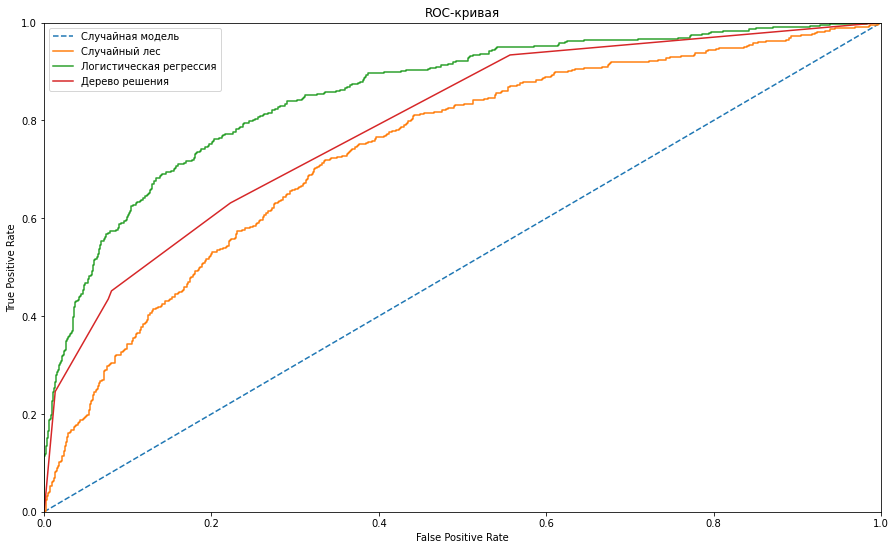

In [47]:
plt.figure()

plt.figure(figsize=(15,9))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Значение площади под кривой. На сколько наша модель отличается от случайной

## Борьба с дисбалансом

In [48]:
#увеличиваю число наблюдений положительного класса:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [49]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print('Для дерева решений на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для дерева решений на увеличенной выборке F1 = 0.4957264957264958
AUC-ROC = 0.6787605817071947


In [50]:
model = DecisionTreeClassifier(random_state=12345,max_depth=3)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print('Для дерева решений на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для дерева решений на увеличенной выборке F1 = 0.5129682997118156
AUC-ROC = 0.7914352445241962


In [51]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print('Для случайного леса на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для случайного леса на увеличенной выборке F1 = 0.5816733067729083
AUC-ROC = 0.8495452508053866


In [52]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=5)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print('Для случайного леса на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для случайного леса на увеличенной выборке F1 = 0.5903846153846154
AUC-ROC = 0.8446941929719627


In [53]:
model = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=14)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print('Для случайного леса на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для случайного леса на увеличенной выборке F1 = 0.5963190184049081
AUC-ROC = 0.8547643354305613


In [54]:
n_estimators_values = range(50, 150, 10)
max_depth_values = range(2, 15)
best_f1_score = 0
best_auc_roc_score = 0
best_n_estimators = 0
best_max_depth = 0
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, max_depth=max_depth)
        model_rfc.fit(features_upsampled, target_upsampled)
        rfc_prediction = model_rfc.predict(features_valid)
        f1 = f1_score(target_valid, rfc_prediction)
        auc_roc = roc_auc_score(target_valid, model_rfc.predict_proba(features_valid)[:,1])
        if f1 > best_f1_score:
            best_f1_score = f1
            best_auc_roc_score = auc_roc
            best_n_estimators = n_estimators
            best_max_depth = max_depth
print('Лучший F1:', best_f1_score)
print('Лучший AUC-ROC:', best_auc_roc_score)
print('Лучшее кол-во деревьев:', best_n_estimators)
print('Лучшая глубина:', best_max_depth)

Лучший F1: 0.615539858728557
Лучший AUC-ROC: 0.8562671739589938
Лучшее кол-во деревьев: 120
Лучшая глубина: 8


Для LogisticRegression не делал , так как нулевые значения в предыдущем разделе

In [55]:
#уменьшаю число наблюдений положительного класса:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [56]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid)

print('Для дерева решений на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для дерева решений на увеличенной выборке F1 = 0.49128919860627185
AUC-ROC = 0.6928767702388502


In [57]:
model = DecisionTreeClassifier(random_state=12345,max_depth=3)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid)

print('Для дерева решений на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для дерева решений на увеличенной выборке F1 = 0.5261158594491927
AUC-ROC = 0.7961139069154558


In [58]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid)

print('Для случайного леса на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для случайного леса на увеличенной выборке F1 = 0.584870848708487
AUC-ROC = 0.8450247424936776


In [59]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=5)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid)

print('Для случайного леса на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для случайного леса на увеличенной выборке F1 = 0.5818847209515097
AUC-ROC = 0.8395088378898198


In [60]:
model = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=14)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid)

print('Для случайного леса на увеличенной выборке F1 =', f1_score(target_valid, predicted_valid))
print('AUC-ROC =', roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1]))

Для случайного леса на увеличенной выборке F1 = 0.5841035120147874
AUC-ROC = 0.8490153222070814


In [61]:
n_estimators_values = range(50, 150, 10)
max_depth_values = range(2, 15)
best_f1_score = 0
best_auc_roc_score = 0
best_n_estimators = 0
best_max_depth = 0
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, max_depth=max_depth)
        model_rfc.fit(features_downsampled, target_downsampled)
        rfc_prediction = model_rfc.predict(features_valid)
        f1 = f1_score(target_valid, rfc_prediction)
        auc_roc = roc_auc_score(target_valid, model_rfc.predict_proba(features_valid)[:,1])
        if f1 > best_f1_score:
            best_f1_score = f1
            best_auc_roc_score = auc_roc
            best_n_estimators = n_estimators
            best_max_depth = max_depth
print('Лучший F1:', best_f1_score)
print('Лучший AUC-ROC:', best_auc_roc_score)
print('Лучшее кол-во деревьев:', best_n_estimators)
print('Лучшая глубина:', best_max_depth)

Лучший F1: 0.5942432683379758
Лучший AUC-ROC: 0.8493848480896335
Лучшее кол-во деревьев: 110
Лучшая глубина: 9


Лучшая модель по показателям F1 и AUC-ROC - случайный лес

**Проверка баланса классов показала, что есть большой дисбаланс классов, примерно в 4 раза**

**Проверили работу моделей**

**Сбалансирровали данные и проверили работу моделей**

**На сбалансированных данных модель показывала результат лучше**

## Тестирование модели

In [62]:
features_train_valid = pd.concat([features_train] + [features_valid])
target_train_valid = pd.concat([target_train] + [target_valid]) 

In [63]:
features_upsampled, target_upsampled = upsample(features_train_valid, target_train_valid, 4)

In [64]:
model_rfc_test = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=8)
model_rfc_test.fit(features_upsampled, target_upsampled)
predictions_rfc_test = model_rfc_test.predict(features_test)

print('F1 =', f1_score(target_test, predictions_rfc_test))
print('AUC-ROC =', roc_auc_score(target_test, model_rfc_test.predict_proba(features_test)[:,1]))

F1 = 0.618905472636816
AUC-ROC = 0.859362807662761


**Вывод** 

В первоначальных данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

Устранили дисбаланс классов в обучающей выборки, увеличили количество значений позитивного класса.

Посмотрели несколько вариантов работы с дисбалансом.

На новых данных все модели показали результат выше, чем на несбалансированной выборке.Лучшие показатели были у модели случайного леса : (ЛЛучшее кол-во деревьев:  120     Лучшая глубина:  8     Лучший F1:  0.615539858728557)

Тестирование модели показало, что она рабочая. Мы смошли достичь F1 метрики не менее 0,59, а именно наша модель показывает 0.6189

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.


- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*